# Import Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
dzip_df = pd.read_excel('data.xlsx', sheet_name='dzip',header=None)
dzip= dzip_df.to_numpy()

azip_df = pd.read_excel('data.xlsx', sheet_name='azip',header=None)
azip=azip_df.to_numpy()

dtest_df = pd.read_excel('data.xlsx', sheet_name='dtest',header=None)
dtest= dtest_df.to_numpy()

testzip_df = pd.read_excel('data.xlsx', sheet_name='testzip',header=None)
testzip= testzip_df.to_numpy()




C:\Users\User\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


The image for the digit  6  is:


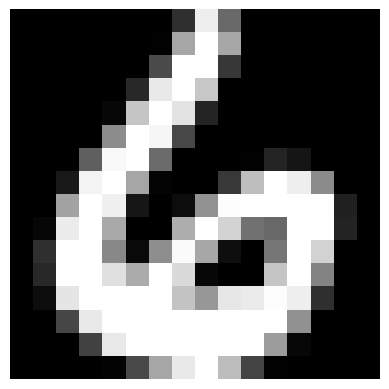

The image for the digit  5  is:


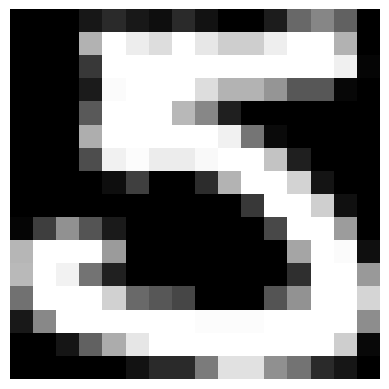

The image for the digit  4  is:


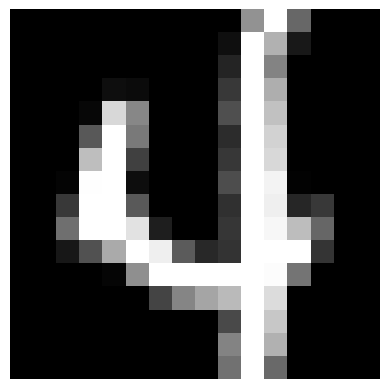

In [5]:
# Function to display a digit image
def display_digit(image_vector):
    plt.imshow(image_vector.reshape(16, 16), cmap='gray')
    plt.axis('off')
    plt.show()

# Display a few sample images from the training set
for i in range(3):
    sample_image = azip[:, i]
    print('The image for the digit ',dzip[0,i], ' is:')
    display_digit(sample_image)

# Perform SVD on training data

## Separate the training data by digit class

In [6]:
import numpy as np

# Check the shapes of azip and dzip
print("azip shape:", azip.shape)
print("dzip shape:", dzip.shape)

# Flatten dzip to ensure it is 1-dimensional
dzip = dzip.flatten()

# Create a dictionary where each key is a digit and the value is the filtered rows of azip
class_data = {digit: azip[:, dzip == digit] for digit in np.unique(dzip)}

# Display the class_data to verify
for digit, data in class_data.items():
    print(f"Digit {digit}:")
    print(data)


azip shape: (256, 1707)
dzip shape: (1, 1707)
Digit 0:
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
Digit 1:
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
Digit 2:
[[-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 ...
 [ 0.567 -1.    -1.    ... -1.    -1.    -1.   ]
 [-0.664 -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]]
Digit 3:
[[-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 ...
 [-0.883 -1.    -0.526 ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.   

In [7]:
# Compute SVD for each class and store the singular vectors
class_svd = {}
for digit, data in class_data.items():
    U, S, Vt = np.linalg.svd(data, full_matrices=False)
    class_svd[digit] = U  # We only need the left singular vectors

# Display the singular values for each class (for further analysis)
singular_values = {digit: np.linalg.svd(data, full_matrices=False)[1] for digit, data in class_data.items()}

In [55]:
# The dimensions of matrix U for the mulriple digits
for i in range(10):
    print(class_svd[i].shape)

(256, 256)
(256, 252)
(256, 202)
(256, 131)
(256, 122)
(256, 88)
(256, 151)
(256, 166)
(256, 144)
(256, 132)


## Classify Test Data

We create a function that classifies a given digit vector by comparing it to different digit classes represented by their Singular Value Decomposition (SVD) basis vectors. For each digit class, it calculates the residual (error) when projecting the digit vector onto a subspace defined by a specified number of basis vectors from the class's SVD. The function returns the digit class with the smallest residual, indicating the closest match.

Then we build a function to classify all the digits using a specified number of basis vectors and an additional one for evaluating the classification accuracy.

In [49]:
# Function that classifies one vector to specific digit

def classify_digit(digit_vector, class_svd, num_basis_vectors):
    residuals = {}
    for digit, U in class_svd.items():
        Identity_Matrix=np.identity(256)
        U=class_svd[digit][:, :num_basis_vectors]
        U_t=np.transpose(class_svd[digit][:, :num_basis_vectors])
        res= (Identity_Matrix - (U @ U_t)) @ digit_vector
        residual=np.linalg.norm(res,ord=2)
        residuals[digit] = residual
    return min(residuals, key=residuals.get)

# Use the above function to classify all test digits using a specified number of basis vectors
def classify_all(test_data, class_svd, num_basis_vectors):
    predictions = []
    for i in range(test_data.shape[1]):
        digit_vector = test_data[:, i]
        predicted_digit = classify_digit(digit_vector, class_svd, num_basis_vectors)
        predictions.append(predicted_digit)
    return np.array(predictions)

# Evaluate classification accuracy
def evaluate_accuracy(predictions, true_labels):
    return np.mean(predictions == true_labels)

In this step we tune the number of basis vectors for the digit classification task by evaluating the accuracy of the classifier across a range of values for the number of basis vectors.

In [53]:
# Tune the number of basis vectors
num_basis_vectors_list = range(5, 21)
accuracies = []

for num_basis_vectors in num_basis_vectors_list:
    predictions = classify_all(testzip, class_svd, num_basis_vectors)
    accuracy = evaluate_accuracy(predictions, dtest)
    accuracies.append(accuracy)

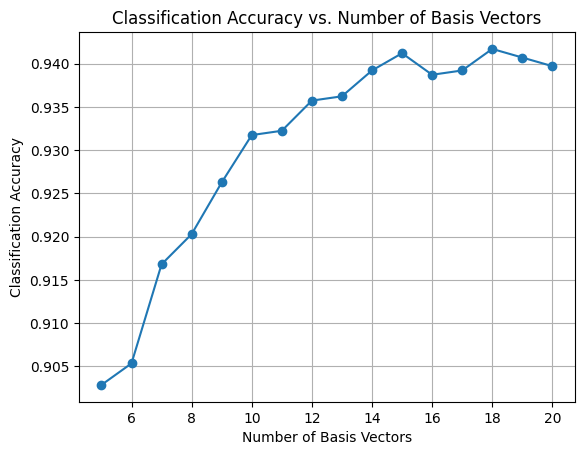

In [54]:
# Plot accuracy as a function of the number of basis vectors
plt.plot(num_basis_vectors_list, accuracies, marker='o')
plt.xlabel('Number of Basis Vectors')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs. Number of Basis Vectors')
plt.grid(True)
plt.show()


From the graph above, 18 is a good number of basis vectors to ensure high accuracy (approximately 95%).

## Check if all digits are equally easy or difficult to classify

In [109]:
misclassified_digits=[]

for digit in np.unique(dtest):
    indexes = np.where(dtest == digit)[1]
    index_list = indexes.tolist()

#Create a list with the indexes of all missclassified digits
    for i in index_list:
        if (classify_digit(testzip[:,i],class_svd,18) != dtest[0][i]):
            misclassified_digits.append(i)
    
    accuracies = []
    predictions = classify_all(testzip[:,index_list], class_svd, 18)
    accuracy = evaluate_accuracy(predictions, dtest[0][index_list])
        
    print(f"Accuracy for Digit:{digit} = {100*round(accuracy,4)}%")



Accuracy for Digit:0 = 98.89%
Accuracy for Digit:1 = 98.11%
Accuracy for Digit:2 = 89.9%
Accuracy for Digit:3 = 90.36%
Accuracy for Digit:4 = 92.5%
Accuracy for Digit:5 = 88.12%
Accuracy for Digit:6 = 95.88%
Accuracy for Digit:7 = 95.92%
Accuracy for Digit:8 = 92.17%
Accuracy for Digit:9 = 93.22%


From these results, the most difficult digit to identify seems to be the number 5 (88,12%) and the easiest one is the zero (98,89%).

### Missclassified Digits

Here are some examples of digits misclassified by the model.
It's obvious that most of these images cannot even be classified by humans.

Predicted Digit: 9
Actual Digit : 0


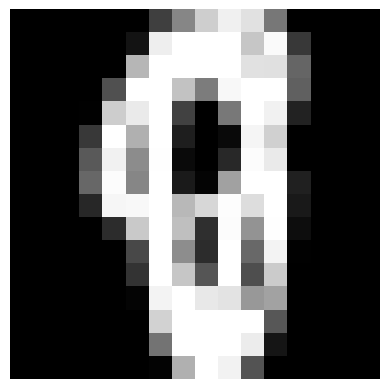

Predicted Digit: 2
Actual Digit : 0


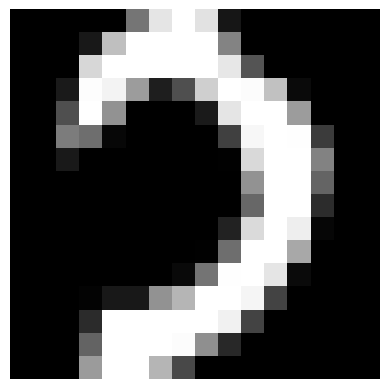

Predicted Digit: 4
Actual Digit : 0


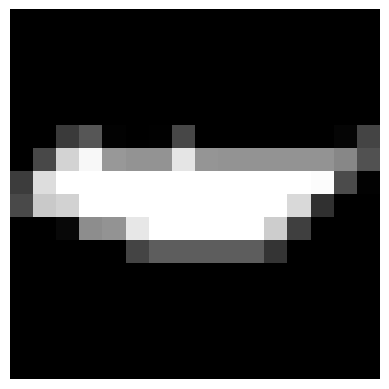

Predicted Digit: 2
Actual Digit : 0


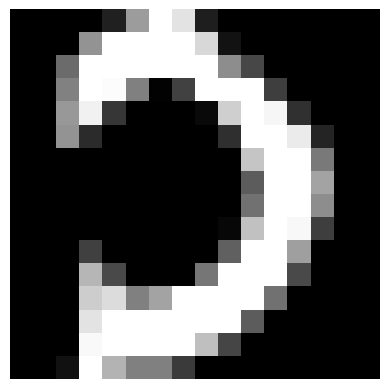

Predicted Digit: 6
Actual Digit : 1


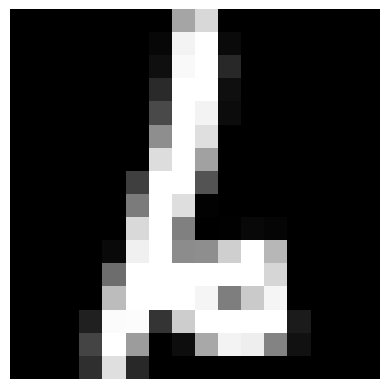

In [105]:
for mis_digits in misclassified_digits[:5]:
    pred_digit=classify_digit(testzip[:,mis_digits],class_svd,18)
    actual_digit=dtest[0][mis_digits]
    print(f"Predicted Digit: {pred_digit}")
    print(f"Actual Digit : {actual_digit}")
    display_digit(testzip[:,mis_digits])
    

## Check the singular values of the different classes

We conducted an analysis focusing on the digits 2 and 5, which exhibited the lowest classification accuracy among all classes. By examining the singular values of these digits, we aimed to determine whether reducing the number of basis vectors could enhance classification performance. However, the singular values didn't give a clear indication that fewer vectors would help.

Through a series of experiments, we observed that decreasing the number of basis vectors had varying effects on performance. Specifically, for digit 5, reducing the basis vectors resulted in a noticeable decline in accuracy, indicating that more basis vectors are crucial for accurately classifying this digit. In contrast, for digit 2, there was a slight improvement in performance when using fewer basis vectors. The accuracy increased to 90.4% with 7 basis vectors, compared to the previous 89.9% achieved with 18 basis vectors.

This small change suggests that for some digits, fewer basis vectors can still work well and might even be a bit better, while also reducing the computation needed.

In [135]:
print("Singular values for Digit 5")
print(singular_values[5])

Singular values for Digit 5
[94.28412631 37.85299086 35.77494073 28.02067178 24.0466634  22.43784723
 20.63123172 20.36365239 17.06151968 16.81156101 15.61171479 15.10407956
 14.18886489 13.1092703  12.36935142 11.6619146  11.05978071 10.8197813
 10.40925525  9.87353984  9.50508394  9.25054025  9.09163378  8.95411268
  8.67548855  8.38361186  8.01950317  7.81407786  7.47485013  7.22266552
  7.05155614  6.91335544  6.72220799  6.49283703  6.39025946  6.21334091
  6.1299576   6.07953736  5.76774097  5.57164498  5.35768988  5.28148066
  5.23302548  5.04480321  4.77753412  4.70168023  4.65543206  4.59988324
  4.43936216  4.33747551  4.24319588  4.19048202  4.11444541  4.00107044
  3.92868776  3.81621007  3.67461299  3.62949599  3.57096976  3.42746324
  3.30852422  3.27829283  3.19975073  3.15382779  3.13366507  2.99174831
  2.90301454  2.84012738  2.80743301  2.69546024  2.66801249  2.57485418
  2.50834159  2.48538946  2.30860856  2.22886137  2.1777024   2.15708173
  2.06489306  1.99107771

In [136]:
print("Singular values for Digit 2")
print(singular_values[5])

Singular values for Digit 2
[94.28412631 37.85299086 35.77494073 28.02067178 24.0466634  22.43784723
 20.63123172 20.36365239 17.06151968 16.81156101 15.61171479 15.10407956
 14.18886489 13.1092703  12.36935142 11.6619146  11.05978071 10.8197813
 10.40925525  9.87353984  9.50508394  9.25054025  9.09163378  8.95411268
  8.67548855  8.38361186  8.01950317  7.81407786  7.47485013  7.22266552
  7.05155614  6.91335544  6.72220799  6.49283703  6.39025946  6.21334091
  6.1299576   6.07953736  5.76774097  5.57164498  5.35768988  5.28148066
  5.23302548  5.04480321  4.77753412  4.70168023  4.65543206  4.59988324
  4.43936216  4.33747551  4.24319588  4.19048202  4.11444541  4.00107044
  3.92868776  3.81621007  3.67461299  3.62949599  3.57096976  3.42746324
  3.30852422  3.27829283  3.19975073  3.15382779  3.13366507  2.99174831
  2.90301454  2.84012738  2.80743301  2.69546024  2.66801249  2.57485418
  2.50834159  2.48538946  2.30860856  2.22886137  2.1777024   2.15708173
  2.06489306  1.99107771

In [115]:
#Basis Vectors: 18
for digit in [2,5]:
    indexes = np.where(dtest == digit)[1]
    index_list = indexes.tolist()

    accuracies = []
    predictions = classify_all(testzip[:,index_list], class_svd, 18)
    accuracy = evaluate_accuracy(predictions, dtest[0][index_list])
        
    print(f"Accuracy for Digit:{digit} = {100*round(accuracy,4)}%")

Accuracy for Digit:2 = 89.9%
Accuracy for Digit:5 = 88.12%


In [134]:
#Basis Vectors: 5-18
for digit in [2,5]:

    max_accuracy=0
    max_basis=0
    print("------------------------")
    print(f"-----Digit: {digit}-----------")
    for b_vec in range(5,19):
        indexes = np.where(dtest == digit)[1]
        index_list = indexes.tolist()

        accuracies = []
        predictions = classify_all(testzip[:,index_list], class_svd, b_vec)
        accuracy = evaluate_accuracy(predictions, dtest[0][index_list])
            
        print(f"Accuracy for {b_vec} Basis Vectors = {round((100*accuracy),2)}%")

        if(accuracy>max_accuracy):
            max_accuracy=accuracy
            max_basis=b_vec
    print("----------------------------------------")        
    print(f"Max accuracy: {round((100*max_accuracy),2)}% for {max_basis} basis vectors")

------------------------
-----Digit: 2-----------
Accuracy for 5 Basis Vectors = 88.38%
Accuracy for 6 Basis Vectors = 87.88%
Accuracy for 7 Basis Vectors = 90.4%
Accuracy for 8 Basis Vectors = 88.89%
Accuracy for 9 Basis Vectors = 89.9%
Accuracy for 10 Basis Vectors = 90.4%
Accuracy for 11 Basis Vectors = 88.89%
Accuracy for 12 Basis Vectors = 90.4%
Accuracy for 13 Basis Vectors = 90.4%
Accuracy for 14 Basis Vectors = 90.4%
Accuracy for 15 Basis Vectors = 90.4%
Accuracy for 16 Basis Vectors = 88.38%
Accuracy for 17 Basis Vectors = 90.4%
Accuracy for 18 Basis Vectors = 89.9%
----------------------------------------
Max accuracy: 90.4% for 7 basis vectors
------------------------
-----Digit: 5-----------
Accuracy for 5 Basis Vectors = 81.88%
Accuracy for 6 Basis Vectors = 82.5%
Accuracy for 7 Basis Vectors = 83.75%
Accuracy for 8 Basis Vectors = 84.38%
Accuracy for 9 Basis Vectors = 85.62%
Accuracy for 10 Basis Vectors = 86.88%
Accuracy for 11 Basis Vectors = 87.5%
Accuracy for 12 Basis